# Úkol č. 2 - regrese

* Termíny jsou uvedeny na [courses.fit.cvut.cz](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s regresní úlohou, s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí délky dožití v různých zemích a letech.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:

* Year - Rok
* Status - Status rozvinuté nebo rozvojové země
* Life expectancy - Délka dožití v letech - **cílová proměnná, kterou budete predikovat**
* Adult Mortality - Úmrtnost dospělých bez ohledu na pohlaví (pravděpodobnost, že osoby, které dosáhly věku 15 let, zemřou před dosažením věku 60 let (uvedeno na 1 000 osob)).
* infant deaths - počet zemřelých kojenců na 1000 obyvatel
* Alcohol - Alkohol, zaznamenaná spotřeba na obyvatele (15+) (v litrech čistého alkoholu)
* percentage expenditure - Výdaje na zdravotnictví v procentech hrubého domácího produktu na obyvatele (%)
* Hepatitis B - pokrytí očkováním proti hepatitidě B (HepB) u dětí ve věku 1 roku (%)
* Measles - Spalničky - počet hlášených případů na 1000 obyvatel
* BMI - průměrný index tělesné hmotnosti celé populace
* under-five deaths - počet úmrtí dětí do pěti let na 1000 obyvatel
* Polio - proočkovanost proti dětské obrně (Pol3) u dětí ve věku 1 roku (%)
* Total expenditure - Výdaje vládních institucí na zdravotnictví jako procento celkových vládních výdajů (%)
* Diphtheria - pokrytí očkováním proti záškrtu, tetanu a černému kašli (DTP3) u jednoletých dětí (%)
* HIV/AIDS - počet úmrtí na 1 000 živě narozených dětí na HIV/AIDS (0-4 roky)
* GDP - hrubý domácí produkt na obyvatele (v USD)
* Population - počet obyvatel země
* thinness 1-19 years - podíl dětí ve věku 10-19 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* thinness 5-9 years - podíl dětí ve věku 5-9 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* Income composition of resources - Index lidského rozvoje z hlediska příjmového složení zdrojů (index v rozmezí 0 až 1)
* Schooling - počet let školní docházky (roky)


## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném regresním modelu.
    * Nějakým způsobem se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace. Vše stručně ale náležitě komentujte.
<br /><br />
  * Vytvořte **vlastní implementaci náhodného lesa**. Použijte k tomu níže předpřipravenou kostru.
  
  * Na připravená data postupně aplikujte Vaši předchozí implementaci modelu náhodného lesa, dále jeden z modelů **lineární regrese** nebo **hřebenové regrese**, a alespoň jeden další model podle Vašeho uvážení, přičemž pro každý z těchto modelů přiměřeně:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Experimentujte s normalizací (standardizace/min-max), pokud pro daný model očekáváte její příznivý vliv.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty (vzhledem k RMSE).
    * Pro model s nejlepšími hodnotami hyperparametrů určete jeho chybu pomocí RMSE a MAE. _Pozor na metodické chyby!_
    * Získané výsledky vždy řádně okomentujte.
<br /><br />
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a odhadněte, jakou chybu (RMSE) můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tato data. Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte s využitím tří sloupců: **Country**, **Year** a **Life expectancy**. Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka prvních řádků souboru `results.csv`:
  
```
Country,Year,Life expectancy
Peru,2012,71.4
Peru,2013,72.6
...
```


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

# Vypracování

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import resample

## Předzpracování vstupního souboru

Načteme data.csv do proměnné data a podíváme, jaké příznaky datové typy mají. Poslouží to k tomu, abychom věděli, jestli je potřeba něco upravovat.

In [2]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   object 
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   object 
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2564 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2188 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2692 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio               

### Zpracování nedefinovaných hodnot

podíváme, jestli nedefinované hodnoty máme.

In [3]:
max(df.isnull().sum())


602

Každou nedefinovanou hodnotu nahradíme -1

In [4]:
df.replace(np.nan, -1, inplace = True)

Podíváme, jestli ještě nedefinované hodnoty jsou.

In [5]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

### Převedení typu objekt na float64

Vybereme všechny příznaky typů objekty, který převedeme na typ category. Poté je zakódujeme do celých čísel pomocí cat.codes. A poté jm přiadíme float64.

In [6]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).astype('category')
df[df.select_dtypes(['category']).columns] = df.select_dtypes('category').apply(lambda x : x.cat.codes)
df.astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   int16  
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   int8   
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2718 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2718 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2718 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio               

### Rozdělení dat na trénovácí, validační a testovací množinu


Nejdříve rozdělíme příznaky na vysvětlovanou proměnnou a skupinu příznaků, který se snaží vysvětlovanou proměnnou vysvětlit. V tomto případě je příznak survived vysvětlovaná proměnná a ostatní příznaky se ji budou snažit vysvětlit.
Do Xdata přiřadíme všechny příznaky kromě příznaku Survived. Do Ydata přiřadíme příznak survived.

In [7]:
random_seed = 42

Xtrain, Xval, ytrain, yval = train_test_split(df.drop(columns = ['Life expectancy']), df['Life expectancy'], test_size=0.4, random_state=random_seed)
Xval, Xtest, yval, ytest = train_test_split(Xval, yval, test_size=0.3, random_state=random_seed)

print(f"Train rozměry, X: {Xtrain.shape}, y: {ytrain.shape}")
print(f"Val rozměry, X: {Xval.shape}, y: {yval.shape}")
print(f"Test rozměry, X: {Xtest.shape}, y: {ytest.shape}")

Train rozměry, X: (1630, 21), y: (1630,)
Val rozměry, X: (761, 21), y: (761,)
Test rozměry, X: (327, 21), y: (327,)


Pro trenovací a validační množinu provedeme normalizaci dat a to uděláme pomocí min-max normalizace 

In [8]:
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xval_scaled = scaler.transform(Xval)
Xtrain_scaled
X_scaled_df_train = pd.DataFrame(Xtrain_scaled, columns=Xtrain.columns)
X_scaled_df_val = pd.DataFrame(Xval_scaled, columns=Xval.columns)

## Modely.

Jako modely jsem si zvolil náhodný les, hřebenovou regresi a lineární regresi.

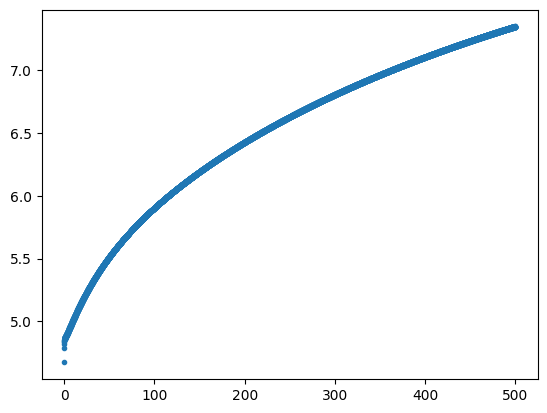

Optimal alpha  message: Solution found.
 success: True
  status: 0
     fun: 4.7048424570626874
       x: 0.0100040712007861
     nit: 38
    nfev: 38




'Validační RMSE: 4.7048424570626874'

'Validační MAE:  3.4926878263650174'

In [9]:
from scipy import optimize
def get_opt_ridge_model(Xtrain, Xval):
    def ridgemodel_eval(alpha):
        clf = Ridge(alpha=alpha)
        clf.fit(Xtrain, ytrain)
        return mean_squared_error(yval, clf.predict(Xval), squared = False)
    alphas = np.linspace(0,500,10000)
    alphas_res = [ridgemodel_eval(alpha) for alpha in alphas]
    plt.plot(alphas, alphas_res, '.')
    plt.show()

    # Find Ridge alpha automatically
    opt_alpha = optimize.minimize_scalar(ridgemodel_eval, options = {'maxiter': 10000}, method = 'bounded', bounds=(0.01, 400))
    print('Optimal alpha', opt_alpha)
    print("\n")

    clf_opt_ridge = Ridge(alpha = opt_alpha.x)
    clf_opt_ridge.fit(Xtrain, ytrain)
    return clf_opt_ridge

clf_opt_ridge = get_opt_ridge_model(X_scaled_df_train, X_scaled_df_val)


display(f'Validační RMSE: {mean_squared_error(yval, clf_opt_ridge.predict(X_scaled_df_val), squared = False)}')
display(f'Validační MAE:  {mean_absolute_error(yval, clf_opt_ridge.predict(X_scaled_df_val))}')

### Nahodne lesy

Nejdříve doplníme do modelu implementaci, kde v konstruktoru jako argumenty jsou hyperparametry.

In [10]:
from numpy.random import default_rng

class CustomRandomForest:
    """
    Třída Vašeho modelu
    Bude se jednat o model náhodného lesa, kde podmodely tvoří rozhodovací stromy pro regresi.
    Pro podmodely můžete použít implementaci DecisionTreeRegressor ze sklearn.
    """
    def __init__(self, n_estimators = 100, max_samples = 5, max_depth = 10, **kwargs):
        """
        Konstruktor modelu
        Základní hyperparametery:
            n_estimators - počet podmodelů - rozhodovacích stromů.
            max_samples - vyberte si, zda tento parametr bude označovat relativní počet bodů (tj. číslo mezi 0 a 1) 
                          nebo absolutní počet bodů (tj. číslo mezi 1 a velikostí trénovací množiny), 
                          které budou pro každý podmodel rozhodovacího stromu náhodně vybrány z trénovací množiny (bootstrap) a použity k jeho trénování.
            max_depth - maximální hloubka každého z podmodelů rozhodovacího stromu.
            kwargs - (volitelně) případné další hyperparametry, které pošlete do podmodelů rozhodovacího stromu
        """
        self.myTrees = [DecisionTreeRegressor(max_depth=max_depth, **kwargs) for _ in range(n_estimators)]
        self.estimators = n_estimators
        self.max_samples = max_samples
        self.rng = default_rng()

    def fit(self, X, y):
        """
        Natrénování modelu. Trénovací data jsou v argumentech X a y.
        Pro trénování podmodelů používejte bootstraping a velikost samplovaného vzorku vezměte z hyperparametru max_samples_fraction
        """
        for tree in self.myTrees:
            sample_indices = np.random.choice(X.shape[0], size=self.max_samples, replace=True)
            X_sample = X.iloc[sample_indices]
            y_sample = y.iloc[sample_indices]
            tree.fit(X_sample, y_sample)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.myTrees])
        return np.mean(predictions, axis=0)

Tady se díváme na různé kombinace hyperparametrů a snažíme se mezi nimi najít takový, který by byl nejlepší. Protože je taková operace časově náročná a jednotlivé kombinace hyperparametrů se nijak vzájemně neovlivňují, má cenu zkusit si to zparalelizovat.

In [11]:
from joblib import Parallel, delayed
from sklearn.metrics import mean_squared_error

def evaluate_model(i, j, k, X_train, y_train, X_val, y_val):
    model = CustomRandomForest(i, j, k)
    model.fit(X_train, y_train)
    rmse = mean_squared_error(y_val, model.predict(X_val), squared=False)
    return (i, j, k, rmse, model)

results_random_forest = Parallel(n_jobs=-1)(delayed(evaluate_model)(i,j, k, X_scaled_df_train, ytrain, X_scaled_df_val, yval)
                              for i in range(35, 38) for k in range(4, 14, 2) for j in range(10, int(len(X_scaled_df_train)), 2))


In [12]:

# Find the minimum value of RMSE in the fourth column
min_value_rmse = min([row[3] for row in results_random_forest])

#best random forest. All hyperparametrs, rmse and trained model is stored in min_value_all_info
min_value_all_info = results_random_forest[[row[3] for row in results_random_forest].index(min_value_rmse)]
# Print or return the minimum value
display(f'RMSE of random forest is {min_value_rmse}')
display(f'MAE of random forest is { mean_absolute_error( yval, min_value_all_info[4].predict(X_scaled_df_val))}')

'RMSE of random forest is 2.082417569993649'

'MAE of random forest is 1.3119158073383954'

### Hřebenová regrese 

Jako hyperparametr si zvolíme alpha, což ukazuje míru regularizace. Budeme chtít tuto míru co nejvíc minimalizovat. Na grafu vidíme RMSE hřebenové regrese na validačních datech od intervalu 0 až 50000.

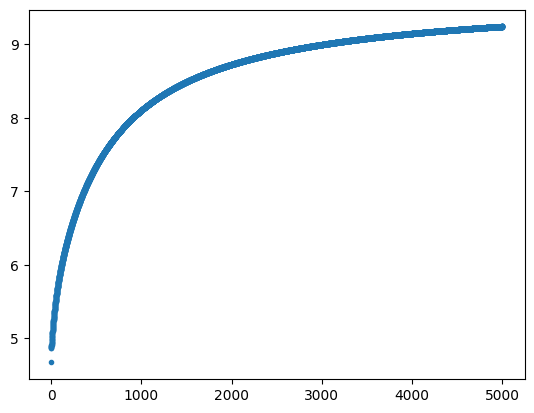

Optimal alpha  message: Solution found.
 success: True
  status: 0
     fun: 4.7048424570626874
       x: 0.0100040712007861
     nit: 38
    nfev: 38




In [13]:
from scipy import optimize

def get_opt_ridge_model(Xtrain, Xval):
    def ridgemodel_eval(alpha):
        clf = Ridge(alpha=alpha)
        clf.fit(Xtrain, ytrain)
        return mean_squared_error(yval, clf.predict(Xval), squared = False)

    alphas = np.linspace(0,5000,10000)
    alphas_res = [ridgemodel_eval(alpha) for alpha in alphas]
    plt.plot(alphas, alphas_res, '.')
    plt.show()

    # Find Ridge alpha automatically
    opt_alpha = optimize.minimize_scalar(ridgemodel_eval, options = {'maxiter': 120000}, method = 'bounded', bounds=(0.01, 400))
    print('Optimal alpha', opt_alpha)
    print("\n")

    clf_opt_ridge = Ridge(alpha = opt_alpha.x)
    clf_opt_ridge.fit(Xtrain, ytrain)
    return clf_opt_ridge

clf_opt_ridge = get_opt_ridge_model(X_scaled_df_train, X_scaled_df_val)

In [14]:
RMSE_val_opt_ridge = mean_squared_error(yval, clf_opt_ridge.predict(X_scaled_df_val), squared = False)
display(f'Validační RMSE: {RMSE_val_opt_ridge}')
display(f'Validační MAE : {mean_absolute_error(yval, clf_opt_ridge.predict(X_scaled_df_val))}')

'Validační RMSE: 4.7048424570626874'

'Validační MAE : 3.4926878263650174'

### Linearní regresse

I když hřebenová je obecnější než lineární, v tomto notebooku se nekoukáme na hyperparametr alpha = 0. Nedíváme se kvůli tomu, že dataframe může obsahovat závislé příznaky. Tento případ ošetříme zvlášť. A protože nemáme zaručeno, že jsou příznaky nezávislé, vytvoříme pseudoinverzní dataframe. 

In [15]:
def make_matrix_for_linear_regression(X):
        return np.matrix(np.concatenate([np.ones((X.shape[0],1)),np.array(X)], axis = 1))
    
XXn = make_matrix_for_linear_regression(X_scaled_df_train)
YY = np.matrix(ytrain).T
wn_hat = np.linalg.pinv(XXn.T*XXn) * XXn.T * YY
RSSn = np.linalg.norm(YY - XXn*wn_hat)**2
print('RSS z pseudoinverze = ', RSSn)
# Matice X odpovídající validační množině
XXnv = make_matrix_for_linear_regression(X_scaled_df_val)

# Predikce pro validační množinu
Ynv_hat = XXnv*wn_hat
Ynv_h = np.array(Ynv_hat).flatten()

# výpočet RMSE a MAE
print('Validační RMSE z pseudoinverze:', mean_squared_error(yval, Ynv_h, squared = False))
print('Validační MAE z pseudoinverze:', mean_absolute_error(yval, Ynv_h))

RSS z pseudoinverze =  28756.992202086807
Validační RMSE z pseudoinverze: 4.672083807186455
Validační MAE z pseudoinverze: 3.482657960536611


I když pseudoinverze je numericky stabilnější, se podíváme, co knihovní LinearRegression. Idealní by bylo, kdyby hodnoty RMSE a MAE získaný dvěma různými přístupy se rovnaly, ale kvůli numerické stabilitě nemusí.

In [17]:
from sklearn.linear_model import LinearRegression
clf_linear_regression_library = LinearRegression()
clf_linear_regression_library.fit(X_scaled_df_train,ytrain)
display('Validační RMSE z library LinearRegression:', mean_squared_error(yval, clf_linear_regression_library.predict(X_scaled_df_val), squared = False))
display('Validační MAE z library LinearRegression:', mean_absolute_error(yval, clf_linear_regression_library.predict(X_scaled_df_val)))  

'Validační RMSE z library LinearRegression:'

4.6720838071865085

'Validační MAE z library LinearRegression:'

3.4826579605366783

## Volba modelu

Když se podíváme na RMSE u jednotlivých modelu, je zřejmý vítěz náhodný les. A proto do proměnné best přiřadíme instanci náhodného lesa s nejlepšími hyperparametry. A podíváme se, nakolik jsme přesný na testovacích datech.


In [18]:
display(f'rmse of random forest on validation set is {mean_squared_error(yval, min_value_all_info[4].predict(X_scaled_df_val), squared=False)} ')
display(f'rmse of ridge on validation set is {RMSE_val_opt_ridge}')
display(f'rmse of linear regression on validation set is { mean_squared_error(yval, Ynv_h, squared = False)}')



'rmse of random forest on validation set is 2.082417569993649 '

'rmse of ridge on validation set is 4.7048424570626874'

'rmse of linear regression on validation set is 4.672083807186455'

Podíváme, jaký nejlepší výsledek máme z těch modelů, který jsme zkoušeli.

In [19]:
test_predictions = min_value_all_info[4].predict(pd.DataFrame(scaler.fit_transform(Xtest), columns=Xtest.columns))
display(f' result of best random forest is {mean_squared_error(ytest, test_predictions, squared=False)}')

' result of best random forest is 2.0839632182507275'

## Spočítání predikce pro data ze souboru evaluation.csv a uložení výsledku do result.csv

Provedeme podobné úpravy, který jsme prováděli datasetem data.csv. Nejdříve načteme soubor.

In [20]:
eval = pd.read_csv('evaluation.csv')


In [21]:
display(eval.isnull().sum())

Country                             0
Year                                0
Status                              0
Adult Mortality                     0
infant deaths                       0
Alcohol                            39
percentage expenditure              0
Hepatitis B                        23
Measles                             0
BMI                                 6
under-five deaths                   0
Polio                               1
Total expenditure                  37
Diphtheria                          1
HIV/AIDS                            0
GDP                                42
Population                         42
thinness  1-19 years                6
thinness 5-9 years                  6
Income composition of resources    18
Schooling                          18
dtype: int64

Co se týče příznaků, které obsahují nevyplněné hodnoty, namísto nevyplněné hodnoty doplníme -1.

In [22]:
eval.replace(np.nan, -1, inplace = True)

Koukneme, jestli se nám to podařilo

In [23]:
display(eval.isnull().sum())

Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

Vybereme všechny příznaky typů objekty, který převedeme na typ category. Poté je zakódujeme do celých čísel pomocí cat.codes. A poté jim přiřadíme float64.

In [24]:
eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          210 non-null    object 
 1   Year                             210 non-null    int64  
 2   Status                           210 non-null    object 
 3   Adult Mortality                  210 non-null    float64
 4   infant deaths                    210 non-null    int64  
 5   Alcohol                          210 non-null    float64
 6   percentage expenditure           210 non-null    float64
 7   Hepatitis B                      210 non-null    float64
 8   Measles                          210 non-null    int64  
 9   BMI                              210 non-null    float64
 10  under-five deaths                210 non-null    int64  
 11  Polio                            210 non-null    float64
 12  Total expenditure     

In [25]:
eval[eval.select_dtypes(['object']).columns] = eval.select_dtypes(['object']).astype('category')
eval[eval.select_dtypes(['category']).columns] = eval.select_dtypes('category').apply(lambda x : x.cat.codes)
eval.astype('float64')
eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          210 non-null    int8   
 1   Year                             210 non-null    int64  
 2   Status                           210 non-null    int8   
 3   Adult Mortality                  210 non-null    float64
 4   infant deaths                    210 non-null    int64  
 5   Alcohol                          210 non-null    float64
 6   percentage expenditure           210 non-null    float64
 7   Hepatitis B                      210 non-null    float64
 8   Measles                          210 non-null    int64  
 9   BMI                              210 non-null    float64
 10  under-five deaths                210 non-null    int64  
 11  Polio                            210 non-null    float64
 12  Total expenditure     

Spočítáme predikce pro data ze souboru evaluation.csv, zobrázíme si výsledky predikce a uložíme si je do result.csv.

In [26]:
predictions = min_value_all_info[4].predict(pd.DataFrame(scaler.fit_transform(eval), columns=eval.columns))
res = pd.concat([pd.read_csv('evaluation.csv')[["Country", "Year"]], pd.Series(["{:.1f}".format(pred) for pred in predictions], name="Life expectancy")], axis = 1)
display(res)
res.to_csv('results.csv')

,Country,Year,Life expectancy
0,Azerbaijan,2015,71.5
1,Azerbaijan,2014,72.4
2,Azerbaijan,2013,71.8
3,Azerbaijan,2012,71.5
4,Azerbaijan,2011,71.4
...,...,...,...
205,United Republic of Tanzania,2014,54.8
206,United Republic of Tanzania,2013,50.6
207,United Republic of Tanzania,2012,47.4
208,United Republic of Tanzania,2011,48.4
